> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Classify common images

In this activity, you'll train models to associate images representing common objects with their class.

The [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. The classes are completely mutually exclusive. There are 50,000 training images and 10,000 test images.

![CIFAR10 images](images/cifar10.png)

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages (edit this list if needed)
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

TensorFlow version: 2.1.0
Keras version: 2.2.4-tf


## Utility functions

In [4]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['accuracy']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

## Step 1: Loading the data

### Question

* Load the CIFAR10 dataset included with Keras.
* Display the first 30 test images.

In [6]:
# Load the data

# YOUR CODE HERE
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

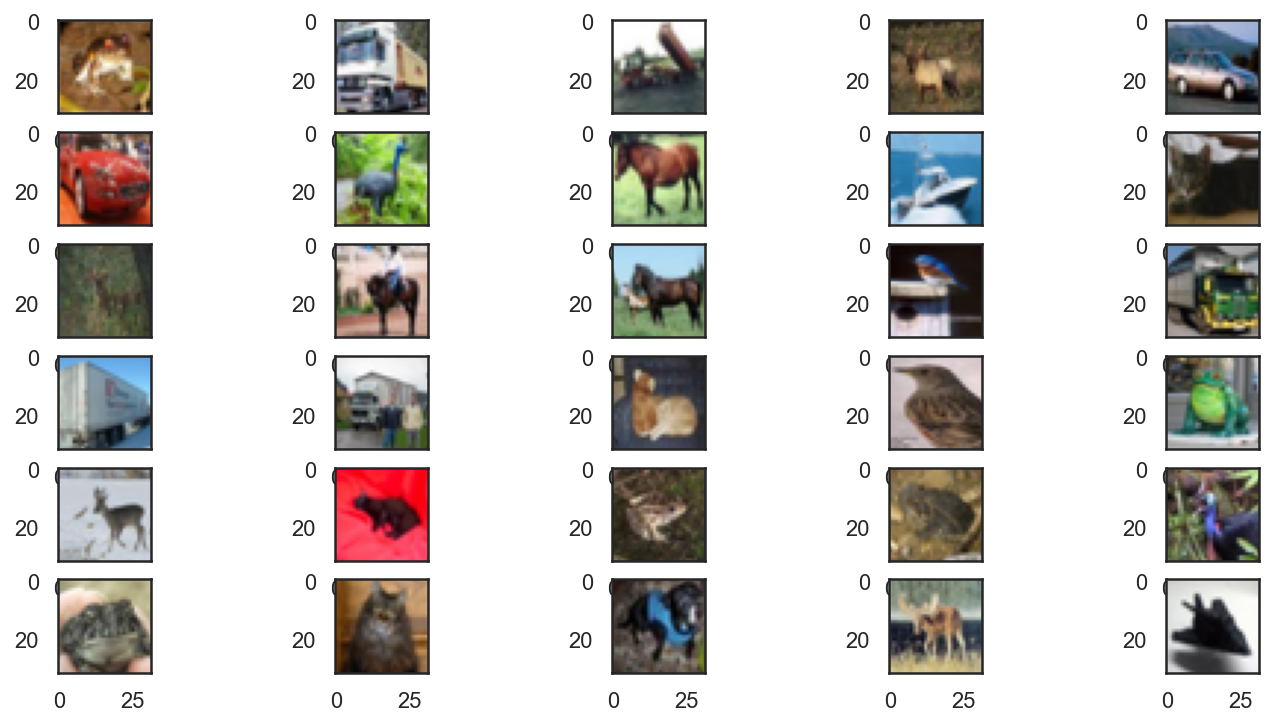

In [7]:
# Plot the first 30 images

# YOUR CODE HERE
with sns.axes_style('white'): # Temporary hide Seaborn grid lines
    plt.figure(figsize=(12, 6))
    for i in range(30):
        image = train_images[i]
        fig = plt.subplot(6, 5, i + 1)
        plt.imshow(image, cmap=plt.cm.binary)

## Step 2: Training a dense neural network

### Question

* Prepare data for training with a dense network.
* Train a model on the data to obtain the expected validation accuracy. Use 20% of the training set for validation. Store the training history in a variable named `history`.

In [17]:
# Prepare data for training

# YOUR CODE HERE
x_train = train_images.astype("float32") / 255.
x_test = test_images.astype("float32") / 255.

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
# Create and train a model

# YOUR CODE HERE
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

# nb params:
# dense_1 = 32*32*3 * 512 + 512 = 1 573 376
# dense_2 = 512 * 10 + 10 = 5130
# total = 1 578 506

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, verbose=1, epochs=20, batch_size=128, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 8s 192us/sample - loss: 2.5751 - accuracy: 0.2308 - val_loss: 1.8918 - val_accuracy: 0.3161
Epoch 2/20
40000/40000 [==============================] - 6s 149us/sample - loss: 1.8628 - accuracy: 0.3296 - val_loss: 1.8503 - val_accuracy: 0.3313
Epoch 3/20
40000/40000 [==============================] - 6s 140us/sample - loss: 1.7520 - accuracy: 0.3737 - val_loss: 1.7112 - val_accuracy: 0.3945
Epoch 4/20
40000/40000 [==============================] - 6s 138us/sample - loss: 1.6907 - accuracy: 0.3988 - val_loss: 1.7629 - val_accuracy: 0.3699
Epoch 5/20
40000/40000 [==============================] - 6s 138us/sample - loss: 1.6453 - accuracy: 0.4164 - val_loss: 1.9018 - val_accuracy: 0.3260
Epoch 6/20
40000/40000 [==============================] - 6s 138us/sample - loss: 1.6124 - accuracy: 0.4265 - val_loss: 1.6273 - val_accuracy: 0.4292
Epoch 7/20
40000/40000 [==========================

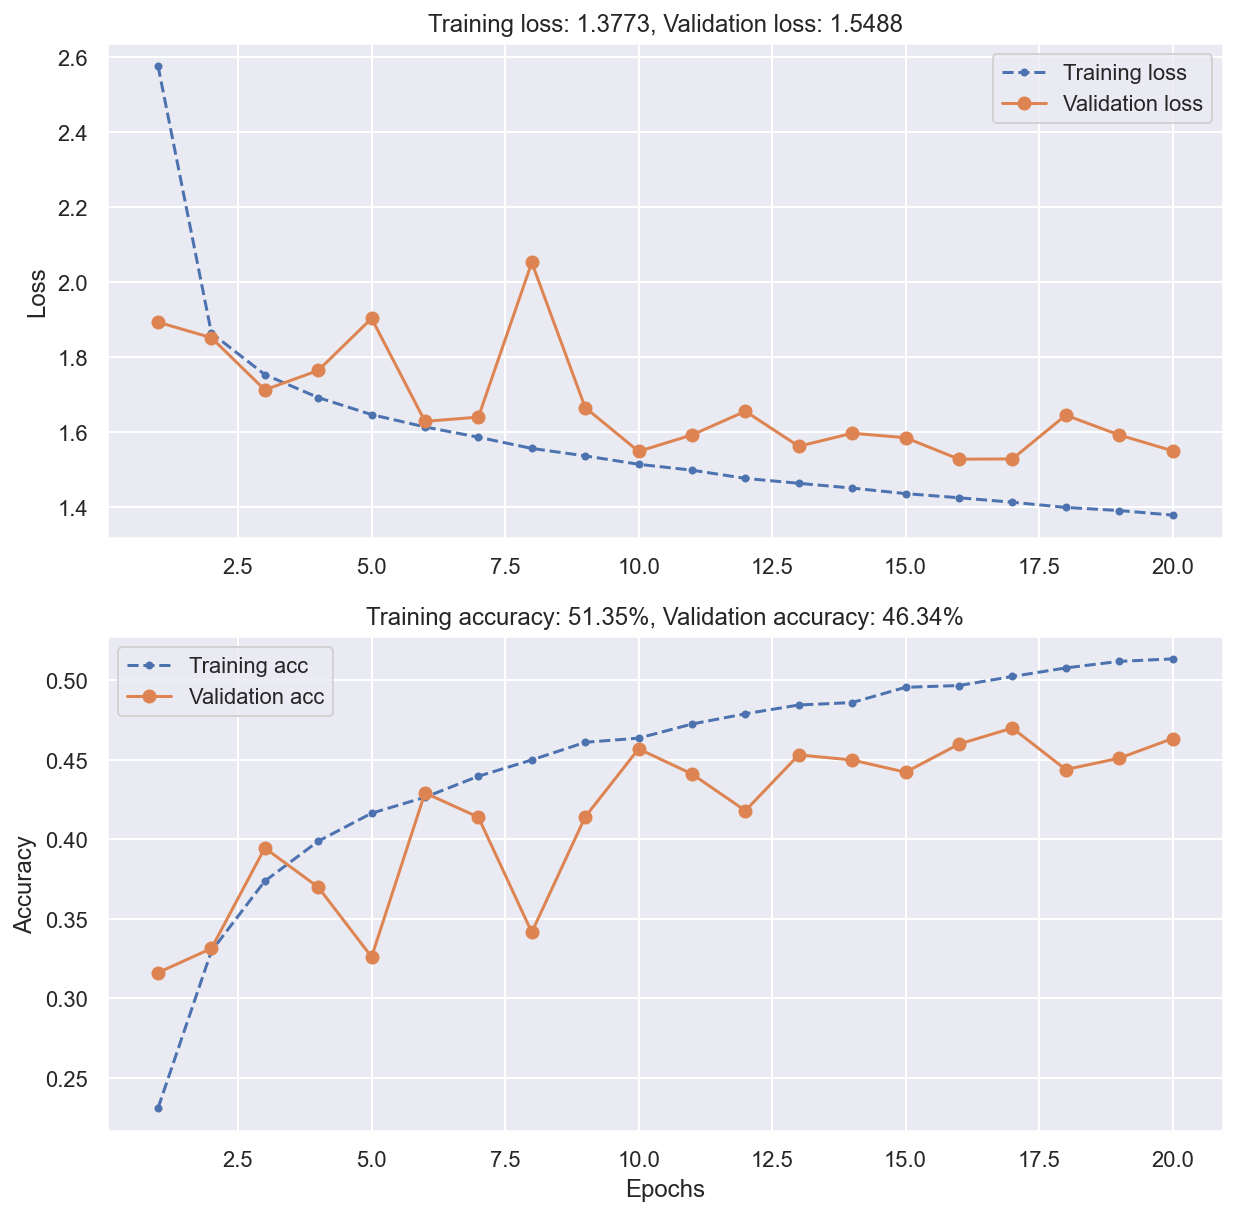

In [23]:
# Plot training history
plot_loss_acc(history)

In [24]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final accuracy
assert val_acc > 0.45

In [25]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 46.29%


## Step 3: Training a convnet

### Question

Train a model on the data to obtain the expected validation accuracy. Store the training history in a variable named `history`.

In [ ]:
# Create a convnet

# YOUR CODE HERE

In [ ]:
# Train the convnet

# YOUR CODE HERE

In [ ]:
# Plot training history
plot_loss_acc(history)

In [ ]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final validation accuracy
assert val_acc > 0.66

In [ ]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')